In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

## Pré-Processamento

In [33]:
#Resultados do 4º Inventário Nacional (1990- 2016) por Unidade Federativa - Total Brasil
#df = pd.read_csv('csv Dataviz/setor/4cn_1990-2016_agropecuaria.csv')
#df = pd.read_csv('4cn_uf_total-brasil.csv', skipinitialspace = True)
df = pd.read_csv('csv Dataviz/uf/4cn_uf_total-brasil.csv', skipinitialspace = True)

In [34]:
df.head(3)

,CO₂e (GWP SAR)\n(Gg),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Rondônia,"122,033","93,592","118,816","130,559","129,881","302,947","143,686","114,840","116,660",...,"129,702","90,885","36,437","33,143","63,714","58,277","69,164","52,616","79,502","105,958"
1,Acre,"36,541","25,361","32,864","36,269","35,814","88,874","26,833","21,473","34,621",...,"13,424","22,592","10,690","21,747","14,789","17,830","10,222","18,107","14,753","24,460"
2,Amazonas,"43,000","26,544","28,900","13,474","9,724","86,043","8,608","- 18,586","- 13,637",...,"- 36,876","- 38,605","- 73,193","- 55,506","- 83,790","- 81,889","- 77,261","- 83,521","- 68,657","- 37,572"


In [ ]:
#para csv agropecuaria
#df.columns = ['CO₂e (GWP SAR)\n(Gg)','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [35]:
#df.reset_index(drop=True, inplace=True)
df.fillna(0, inplace=True)

In [36]:
df.replace(' ', '', regex=True, inplace=True) 

In [37]:
df.head(3)

,CO₂e (GWP SAR)\n(Gg),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Rondônia,"122,033","93,592","118,816","130,559","129,881","302,947","143,686","114,840","116,660",...,"129,702","90,885","36,437","33,143","63,714","58,277","69,164","52,616","79,502","105,958"
1,Acre,"36,541","25,361","32,864","36,269","35,814","88,874","26,833","21,473","34,621",...,"13,424","22,592","10,690","21,747","14,789","17,830","10,222","18,107","14,753","24,460"
2,Amazonas,"43,000","26,544","28,900","13,474","9,724","86,043","8,608","-18,586","-13,637",...,"-36,876","-38,605","-73,193","-55,506","-83,790","-81,889","-77,261","-83,521","-68,657","-37,572"


In [38]:
def remove_comma(x):
  if type(x) == str:
    return int(x.replace(",", ""))

df[df.columns[1:]] = df[df.columns[1:]].applymap(lambda x: remove_comma(x))
#df.replace(',', '.', regex=True, inplace=True)


In [39]:
df = df.dropna()

In [40]:
df

,CO₂e (GWP SAR)\n(Gg),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Rondônia,122033.0,93592.0,118816.0,130559.0,129881.0,302947.0,143686.0,114840.0,116660.0,...,129702.0,90885.0,36437.0,33143.0,63714.0,58277.0,69164.0,52616.0,79502.0,105958.0
1,Acre,36541.0,25361.0,32864.0,36269.0,35814.0,88874.0,26833.0,21473.0,34621.0,...,13424.0,22592.0,10690.0,21747.0,14789.0,17830.0,10222.0,18107.0,14753.0,24460.0
2,Amazonas,43000.0,26544.0,28900.0,13474.0,9724.0,86043.0,8608.0,-18586.0,-13637.0,...,-36876.0,-38605.0,-73193.0,-55506.0,-83790.0,-81889.0,-77261.0,-83521.0,-68657.0,-37572.0
3,Roraima,6378.0,4649.0,-4775.0,-4039.0,-4109.0,7311.0,6678.0,3782.0,7251.0,...,-231.0,16593.0,-12207.0,-3701.0,-8721.0,-9916.0,-5993.0,-1631.0,-6735.0,-2728.0
4,Pará,244632.0,188289.0,229367.0,250132.0,243035.0,598907.0,442907.0,282562.0,415914.0,...,392096.0,402666.0,267381.0,222837.0,179246.0,71731.0,125351.0,87934.0,113830.0,187675.0
5,Amapá,-53.0,-1365.0,-2701.0,-2299.0,-2208.0,292.0,-4997.0,5132.0,10082.0,...,-5456.0,-1344.0,-2952.0,-4094.0,-5628.0,-9301.0,-9379.0,-8283.0,-9963.0,-11255.0
6,Tocantins,48798.0,44193.0,50008.0,52681.0,52650.0,88551.0,56337.0,53795.0,71705.0,...,48243.0,56291.0,49513.0,48725.0,39189.0,41349.0,63288.0,51305.0,66304.0,41019.0
7,Maranhão,100289.0,87459.0,97739.0,103057.0,102605.0,190196.0,133078.0,81606.0,128845.0,...,127402.0,189213.0,112397.0,102487.0,104058.0,90105.0,112677.0,110541.0,97090.0,91225.0
8,Piauí,15791.0,16073.0,16153.0,15933.0,16122.0,19853.0,18976.0,18624.0,18691.0,...,19299.0,19689.0,22840.0,21283.0,25454.0,25978.0,31887.0,29806.0,23516.0,22008.0
9,Ceará,14574.0,15011.0,15120.0,14211.0,14653.0,16942.0,17500.0,17868.0,17544.0,...,24762.0,25478.0,21556.0,20494.0,20683.0,21901.0,23366.0,23794.0,23312.0,24256.0


## Criando estilo personalizado

In [41]:
from matplotlib import style 

In [ ]:
plt.style.use('./imagens/dataviz.mplstyle')

Missing colon in file './imagens/dataviz.mplstyle', line 22 ('plt.tick_params(bottom=True, top=False) ')
Missing colon in file './imagens/dataviz.mplstyle', line 23 ('plt.tick_params(right=False, left=True) ')

Bad key lines.facecolor in file ./imagens/dataviz.mplstyle, line 29 ('lines.facecolor: green')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key title.fontsize in file ./imagens/dataviz.mplstyle, line 38 ('title.fontsize : 16')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key title.color in file ./imagens/dataviz.mplstyle, line 39 ('title.color : black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib so

TypeError: 'value' must be an instance of str or bytes, not a int

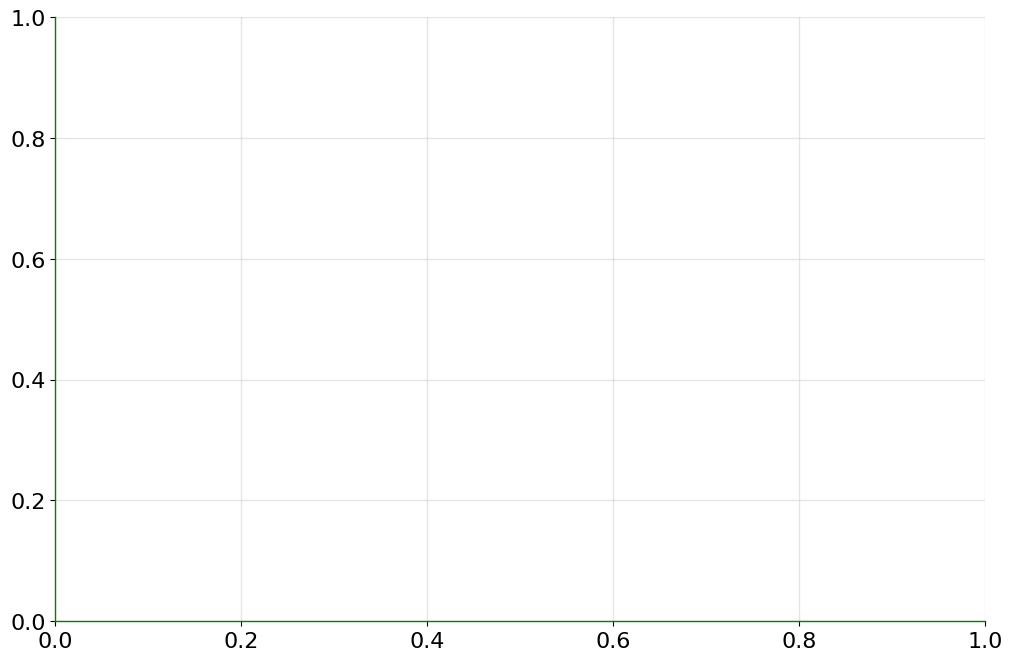

In [ ]:
plt.bar(df['2016'], df['CO₂e (GWP SAR)\n(Gg)'], label='2016')
plt.legend('Plot teste')

## Gráficos

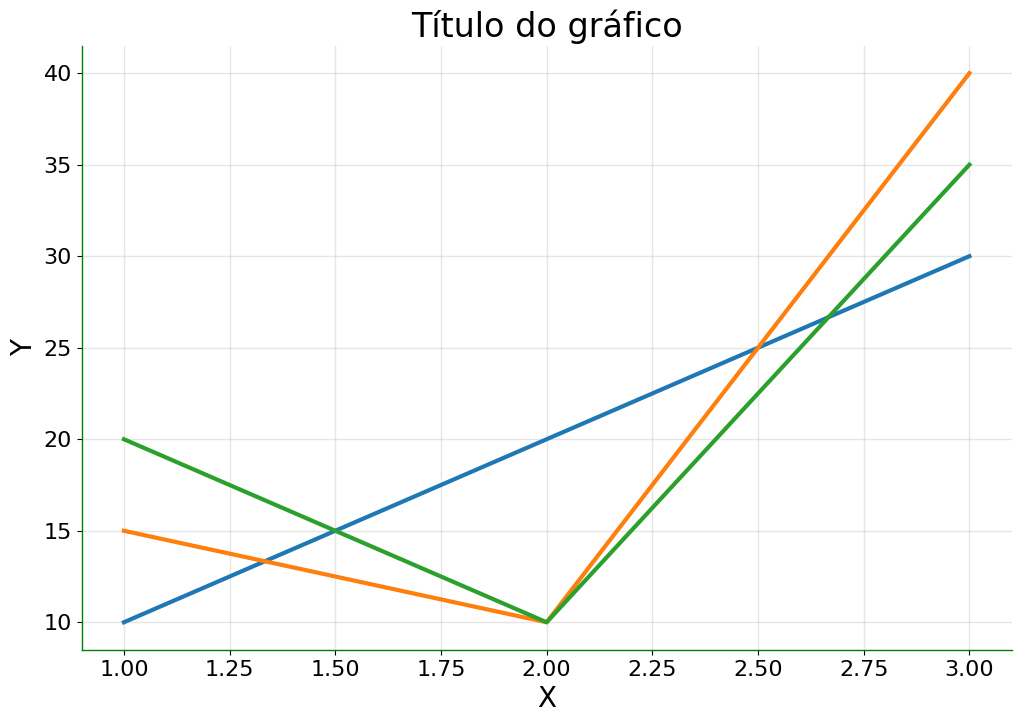

In [ ]:
x = [1, 2, 3]
y = [10, 20, 30]
y2 = [15, 10, 40]
y3 = [20, 10, 35]
yBar = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
z = [i * 1.5 for i in yBar]
xBar = range(len(yBar))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Título do gráfico')
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

In [ ]:
#grafico rosca - mundo, brasil, uf


TypeError: '<' not supported between instances of 'str' and 'int'